C:\Users\mantu\AppData\Local\Temp\ipykernel_10164\1288837693.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(O_dummy))


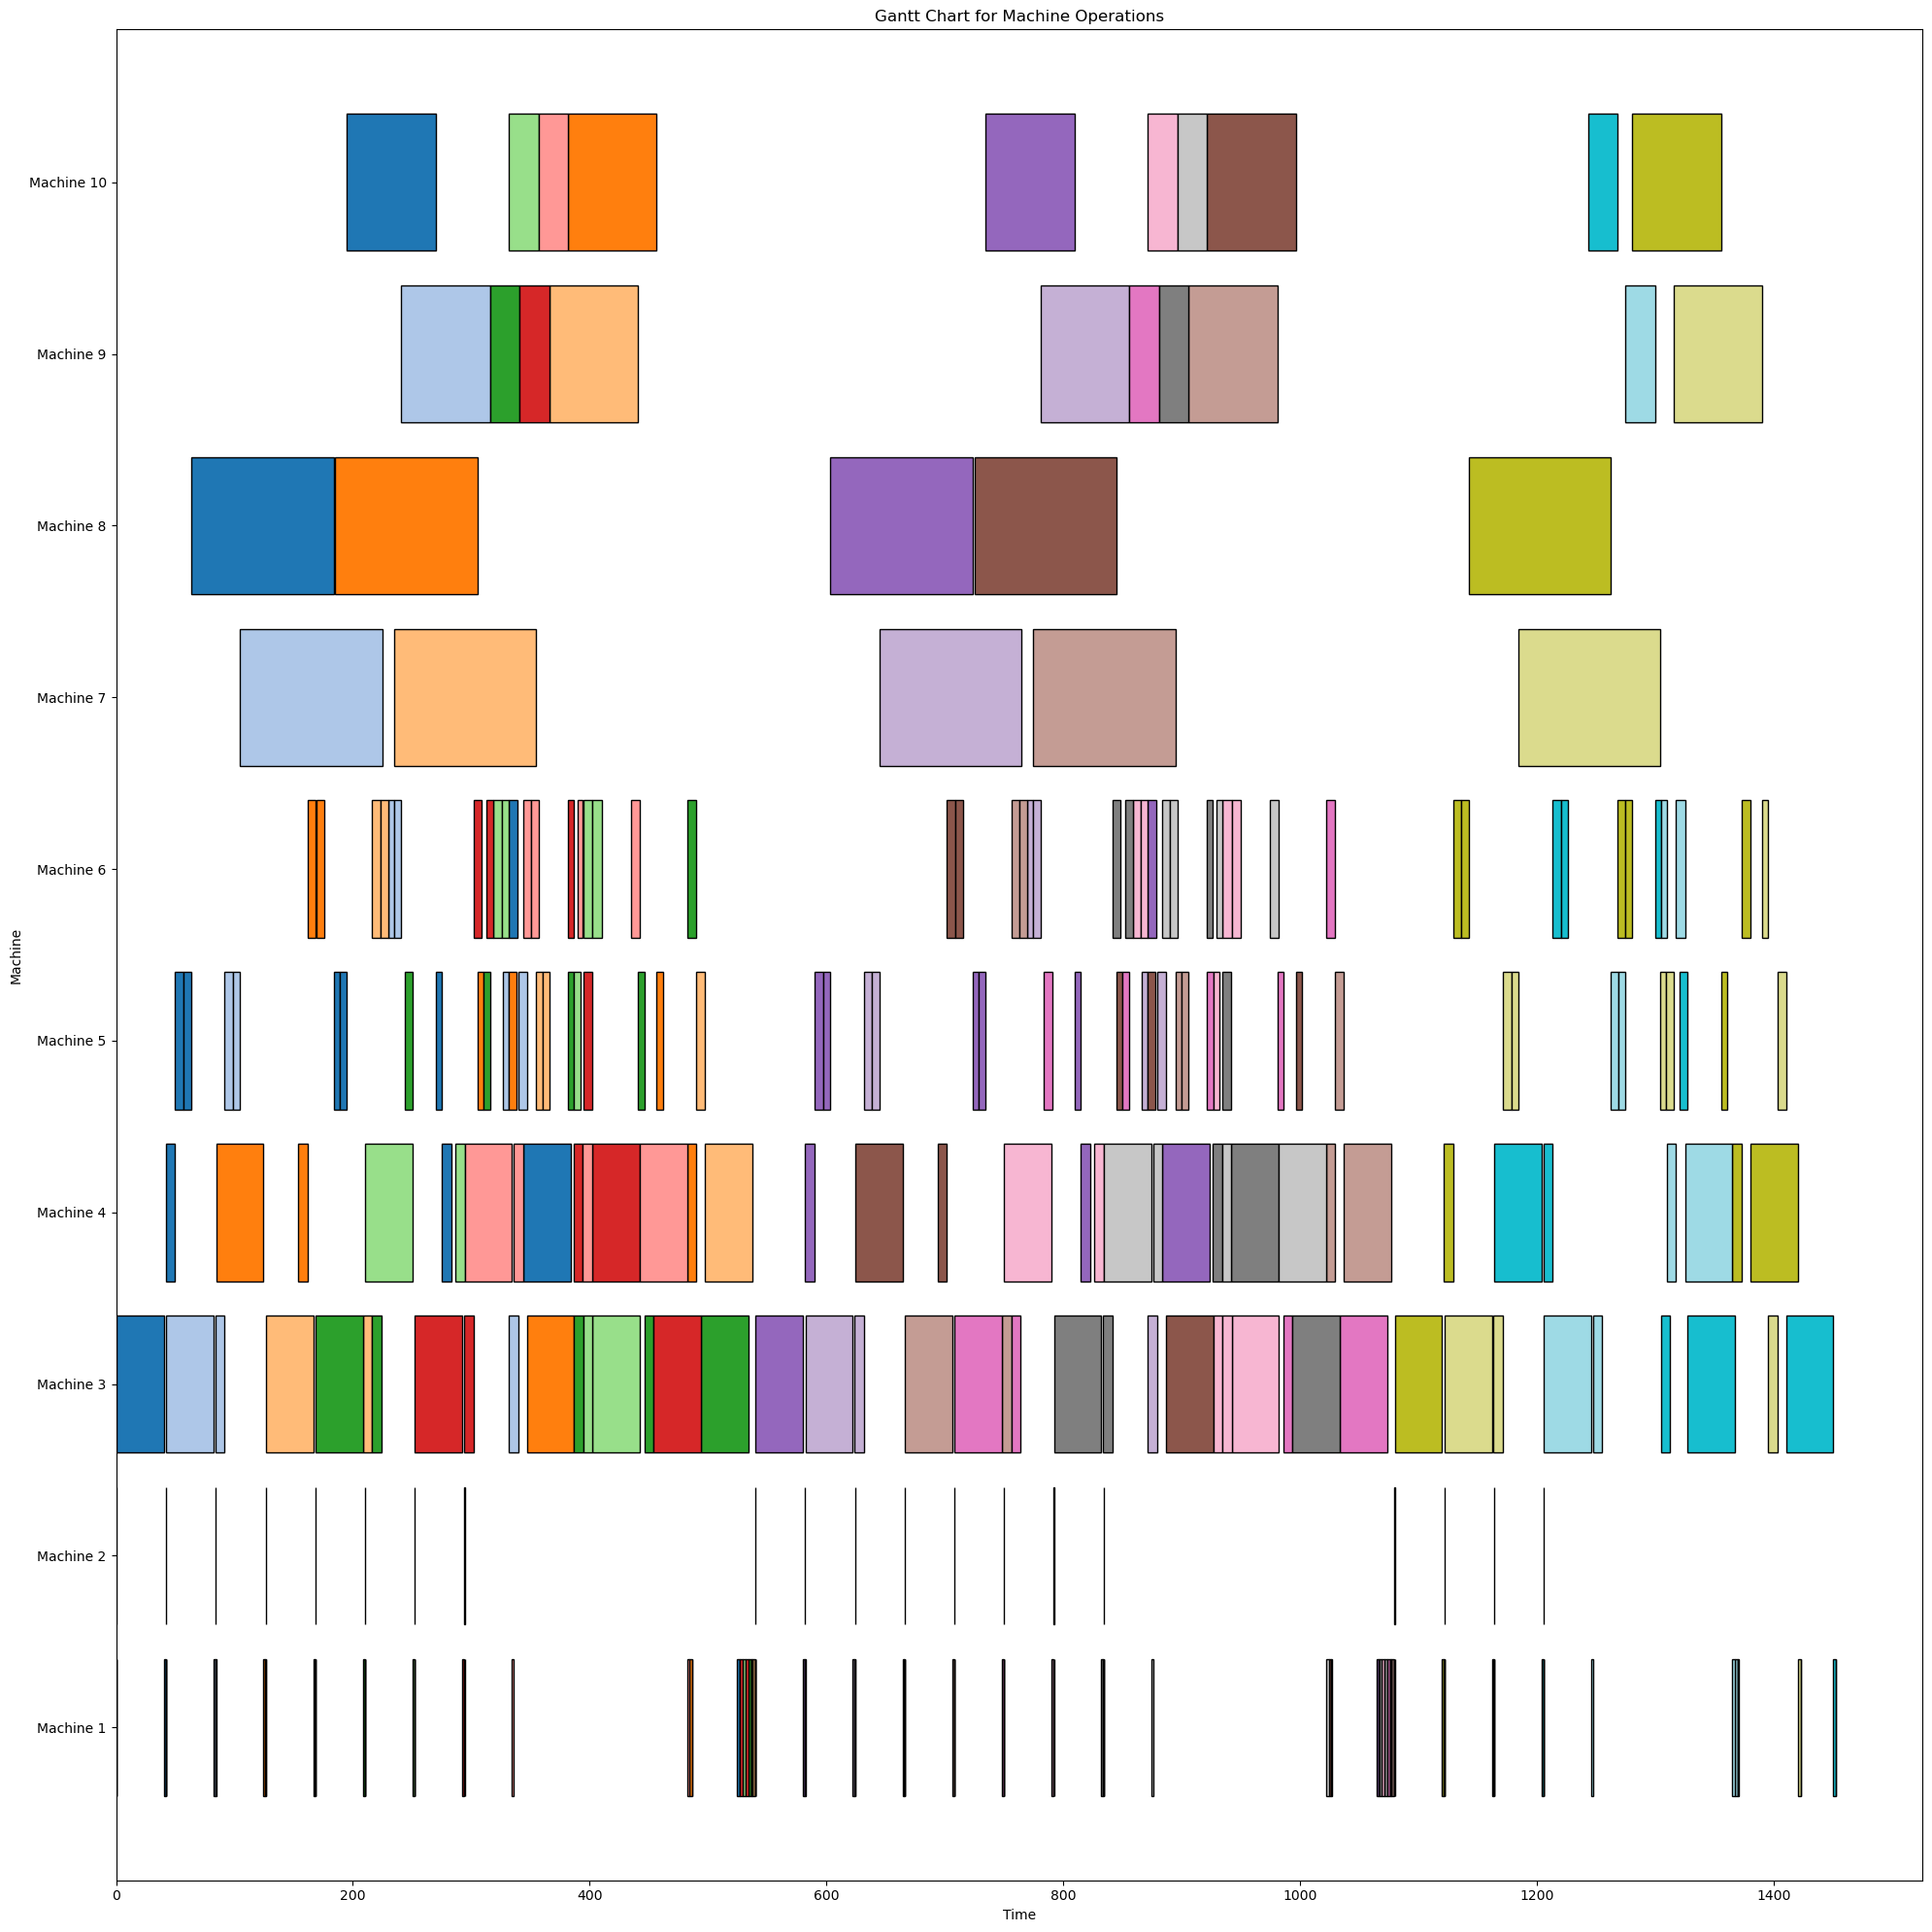

In [34]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        return [list(map(float, row)) for row in reader]

def plot_gantt_chart(O_dummy, t_dummy, e_dummy, num_machines=10):
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(20, 20))

    # Define colors for different operations
    colors = plt.cm.get_cmap('tab20', len(O_dummy))

    # Create a dictionary to store operation labels for the legend
    legend_labels = {}

    # Plot the Gantt chart
    for machine in range(num_machines):
        for i in range(len(O_dummy)):
            if O_dummy[i][machine] == 1.0:
                start = t_dummy[i]
                end = e_dummy[i]
                operation_name = f'Op {i+1}'
                color = colors(i)

                # Plot each operation as a horizontal bar
                ax.barh(machine, end-start, left=start, color=color, edgecolor='black')

                # Store the operation name and color for the legend
                if operation_name not in legend_labels:
                    legend_labels[operation_name] = color

    # Label the axes
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_yticks(np.arange(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_title('Gantt Chart for Machine Operations')

    # Create a legend
    #legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
    #ax.legend(handles=legend_patches, title="Operations", loc='upper right', bbox_to_anchor=(1.15, 1))

    plt.tight_layout()
    plt.show()

# File paths
o_dummy_file = 'O_dummy.csv'
t_dummy_file = 't_dummy.csv'
e_dummy_file = 'e_dummy.csv'

# Read data from CSV files
O_dummy = read_csv(o_dummy_file)
t_dummy = np.array(read_csv(t_dummy_file)).flatten()
e_dummy = np.array(read_csv(e_dummy_file)).flatten()

# Plot the Gantt chart
plot_gantt_chart(O_dummy, t_dummy, e_dummy)


C:\Users\mantu\AppData\Local\Temp\ipykernel_19604\3222462881.py:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(df))


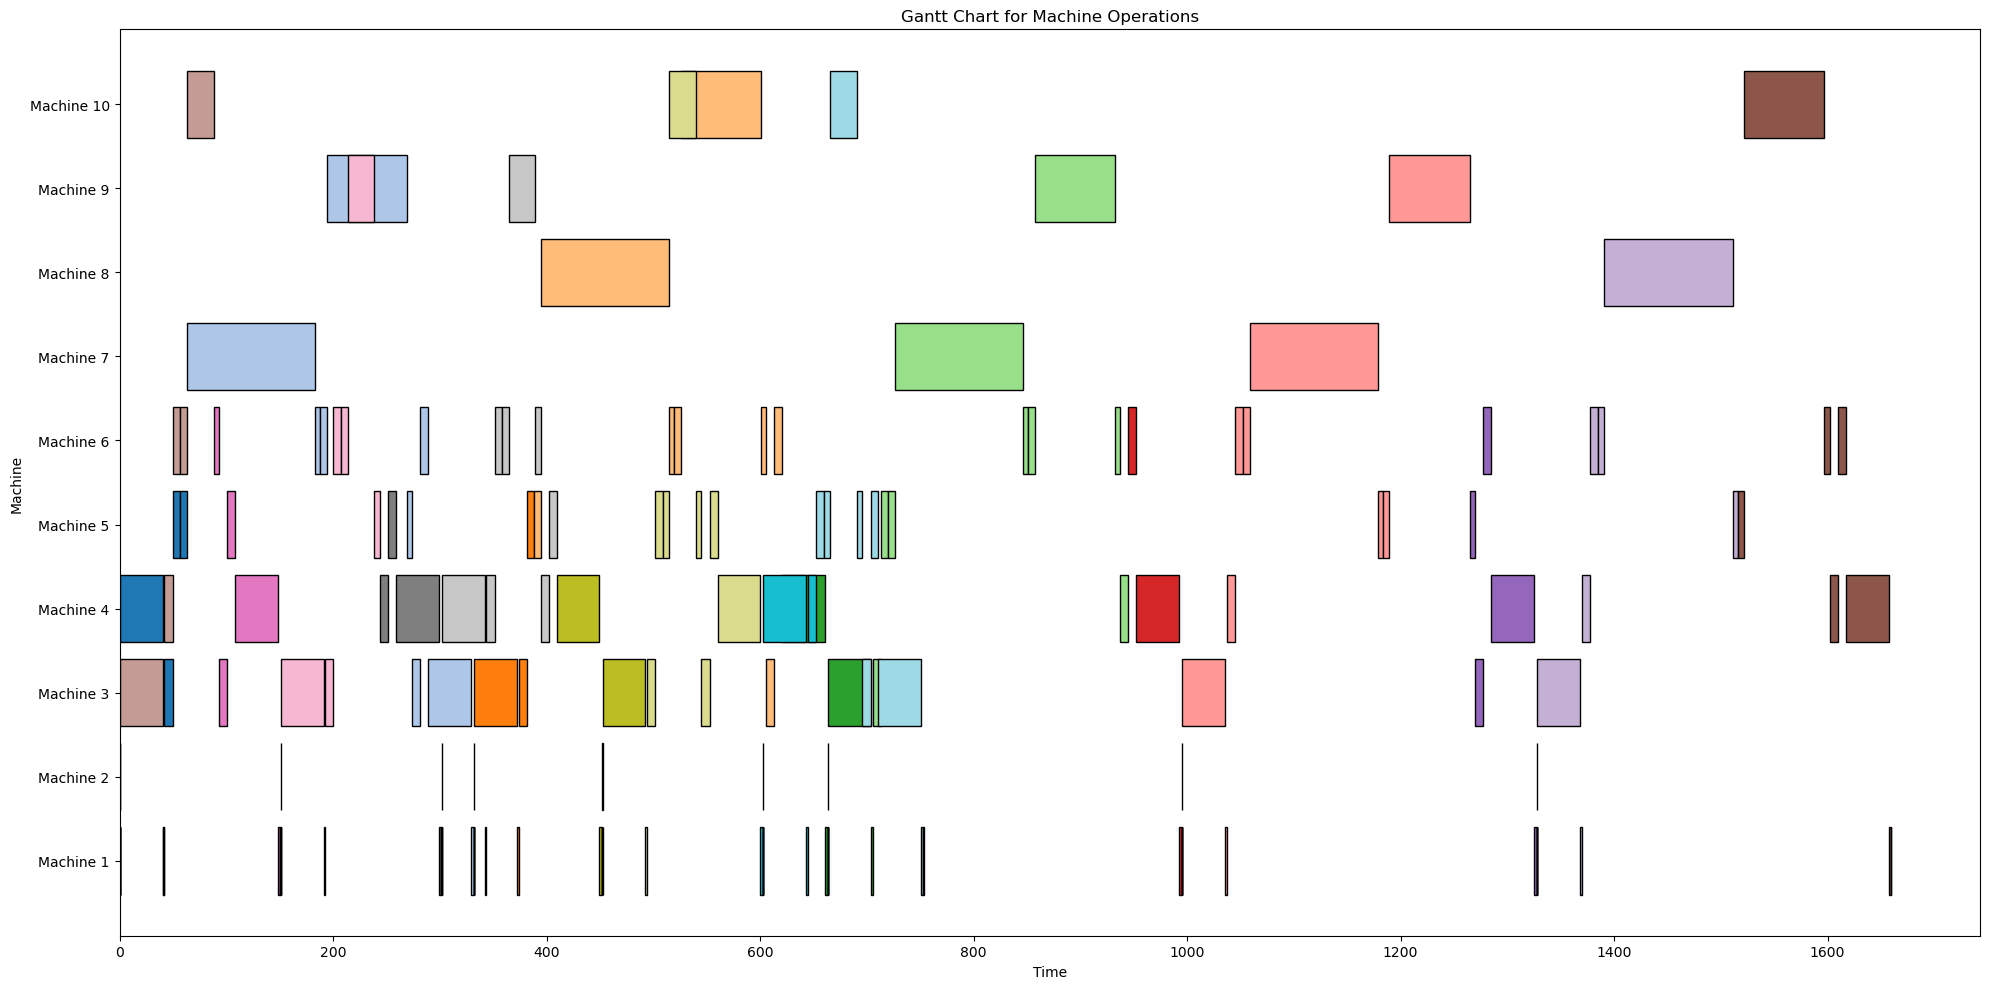

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


# Function to load arrays from CSV files (if needed)
def load_arrays(file_paths):
    arrays = []
    for file_path in file_paths:
        array = np.loadtxt(file_path, delimiter=',')
        arrays.append(array)
    return arrays

# Function to predict the next array based on existing arrays (if needed)
def predict_next_array(arrays, x, y, smoothing_factor=0.5):
    n = len(arrays)
    length_next_array = x * 19 + y * 16
    next_array = np.zeros(length_next_array)
    min_length = min(len(array) for array in arrays)
    aligned_arrays = [array[:min_length] for array in arrays]
    diffs = [aligned_arrays[i+1] - aligned_arrays[i] for i in range(n-1)]
    average_diff = np.mean(diffs, axis=0) * smoothing_factor
    aligned_predicted_next_array = aligned_arrays[-1] + average_diff
    next_array[:min_length] = aligned_predicted_next_array
    if len(next_array) > min_length:
        for i in range(min_length, len(next_array)):
            next_array[i] = next_array[i-1] + average_diff[-1]
    return next_array

# Define eligible machines for job steps
eligible_machines = {
    1: [0], 2: [0], 3: [0], 4: [1], 5: [0], 6: [2], 7: [3], 8: [0], 9: [0],
    10: [4], 11: [5], 12: [4], 13: [5], 14: [4], 15: [5], 16: [4], 17: [5],
    18: [6], 19: [7], 20: [4], 21: [5], 22: [4], 23: [5], 24: [4], 25: [5],
    26: [4], 27: [5], 28: [8], 29: [9], 30: [8], 31: [9], 32: [4], 33: [5],
    34: [4], 35: [5], 36: [2], 37: [3], 38: [4], 39: [5], 40: [4], 41: [5],
    42: [0], 43: [0], 44: [0], 45: [0]
}

# Job A and Job B steps
job_A_steps = [[1], [3], [4], [5], [6, 7], [8, 9], [36, 37], [10, 11, 12, 13],
               [14, 15, 16, 17], [18, 19], [20, 21, 22, 23], [24, 25, 26, 27],
               [28, 29], [32, 33, 34, 35], [36, 37], [38, 39, 40, 41], [6, 7],
               [42, 43], [44]]
job_B_steps = [[2], [3], [4], [5], [6, 7], [8, 9], [36, 37], [10, 11, 12, 13],
               [24, 25, 26, 27], [28, 29], [32, 33, 34, 35], [36, 37],
               [38, 39, 40, 41], [6, 7], [42, 43], [45]]

# Define processing times for Job A and Job B
process_data_A = {
    1: [(0, 0.2)], 2: [(0, 0.1)], 3: [(1, 0.1)], 4: [(0, 0.1)], 5: [(2, 40), (3, 40)],
    6: [(0, 1.5), (0, 1.5)], 7: [(2, 7.8), (3, 7.8)], 8: [(4, 7), (5, 7.1)],
    9: [(4, 6), (5, 6.5)], 10: [(6, 120), (7, 120)], 11: [(4, 5.1), (5, 4.9)],
    12: [(4, 6), (5, 6.2)], 13: [(8, 75), (9, 75)], 14: [(4, 5.2), (5, 4.9)],
    15: [(2, 7.8), (3, 7.8)], 16: [(4, 7.3), (5, 7.5)], 17: [(2, 40), (3, 40)],
    18: [(0, 2.3), (0, 2.3)], 19: [(0, 0.2)]
}
process_data_B = {
    1: [(0, 0.2)], 2: [(0, 0.1)], 3: [(1, 0.1)], 4: [(0, 0.1)], 5: [(2, 40), (3, 40)],
    6: [(0, 1.5), (0, 1.5)], 7: [(2, 7.8), (3, 7.8)], 8: [(4, 7), (5, 7.1)],
    9: [(4, 6), (5, 6.2)], 10: [(8, 25), (9, 25)], 11: [(4, 5.2), (5, 4.9)],
    12: [(2, 7.8), (3, 7.8)], 13: [(4, 7.3), (5, 7.5)], 14: [(2, 40), (3, 40)],
    15: [(0, 2.3), (0, 2.3)], 16: [(0, 0.2)]
}

# Function to select machine and time based on adjacency rule
def select_machine_and_time(operations, previous_machine=None):
    for machine, time in operations:
        if previous_machine is not None and previous_machine == machine:
            return machine, time  # Prefer consistency with the previous machine
    return random.choice(operations)  # Randomly select if no consistent machine found

# Function to process jobs and create O_matrix, time_matrix, start_times, and end_times
def process_job(process_data, num_jobs):
    num_machines = 10  # Assuming 10 machines
    O_matrix = []
    time_matrix = []
    start_times = []
    end_times = []

    current_time = 0  # Initialize the start time
    for job in range(num_jobs):
        previous_machine = None

        for op, machines_times in process_data.items():
            machine, time = select_machine_and_time(machines_times, previous_machine)
            previous_machine = machine

            # Create O_matrix row where the selected machine is marked with 1
            O_row = np.zeros(num_machines)
            O_row[machine] = 1
            O_matrix.append(O_row)

            # Calculate start and end times
            start_times.append(current_time)
            end_times.append(current_time + time)
            current_time += time  # Update current time for the next operation

            # Store the corresponding time
            time_matrix.append(time)

    # Convert lists to numpy arrays
    O_matrix = np.array(O_matrix)
    time_matrix = np.array(time_matrix)
    start_times = np.array(start_times)
    end_times = np.array(end_times)

    return O_matrix, time_matrix, start_times, end_times

def plot_gantt_chart_from_df(df, num_machines=10):
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))

    # Define colors for different operations
    colors = plt.cm.get_cmap('tab20', len(df))

    # Create a dictionary to store operation labels for the legend
    legend_labels = {}

    # Plot the Gantt chart
    for i, row in df.iterrows():
        for machine in range(num_machines):
            if row[f'Machine_{machine+1}'] == 1.0:
                start = row['Start_Time']
                end = row['End_Time']
                operation_name = f'Op {i+1}'
                color = colors(i)

                # Plot each operation as a horizontal bar
                ax.barh(machine, end-start, left=start, color=color, edgecolor='black', label=operation_name)

                # Store the operation name and color for the legend
                if operation_name not in legend_labels:
                    legend_labels[operation_name] = color

    # Label the axes
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_yticks(np.arange(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_title('Gantt Chart for Machine Operations')

    # Create a legend (optional)
    # legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
    # ax.legend(handles=legend_patches, title="Operations", loc='upper right', bbox_to_anchor=(1.15, 1))

    plt.tight_layout()
    plt.show()


# Process 5 jobs of type A and 5 jobs of type B
num_jobs_A = 5
num_jobs_B = 5

O_matrix_A, time_matrix_A, start_times_A, end_times_A = process_job(process_data_A, num_jobs_A)
O_matrix_B, time_matrix_B, start_times_B, end_times_B = process_job(process_data_B, num_jobs_B)

# Combine O_matrices and time_matrices for a complete result
full_O_matrix = np.vstack((O_matrix_A, O_matrix_B))
full_time_matrix = np.hstack((time_matrix_A, time_matrix_B))
full_start_times = np.hstack((start_times_A, start_times_B))
full_end_times = np.hstack((end_times_A, end_times_B))

# Create the final DataFrame
df = pd.DataFrame(full_O_matrix, columns=[f'Machine_{i}' for i in range(1, 11)])
df['Start_Time'] = full_start_times
df['End_Time'] = full_end_times

# Example usage with the DataFrame df:
plot_gantt_chart_from_df(df)